In [1]:
%load_ext autoreload
%autoreload 2

# This tells Python to show the plots inside this notebook.
%matplotlib inline
# We have to import the plotting library into this Jupyter notebook
# We only have to do this once (unless you close and open the notebook,
# then you'll have to do it again)
import matplotlib.pyplot as plt

import pandas

In [38]:
nasa_astronaut_dataset = pandas.read_csv("astronauts.csv")
print (nasa_astronaut_dataset.head) #First 10 rows

<bound method NDFrame.head of                       Name    Year  Group   Status Birth Date  \
0          Joseph M. Acaba  2004.0   19.0   Active  5/17/1967   
1           Loren W. Acton     NaN    NaN  Retired   3/7/1936   
2         James C. Adamson  1984.0   10.0  Retired   3/3/1946   
3          Thomas D. Akers  1987.0   12.0  Retired  5/20/1951   
4              Buzz Aldrin  1963.0    3.0  Retired  1/20/1930   
..                     ...     ...    ...      ...        ...   
352          David A. Wolf  1990.0   13.0  Retired  8/23/1956   
353  Neil W. Woodward III   1998.0   17.0  Retired  7/26/1962   
354       Alfred M. Worden  1966.0    5.0  Retired   2/7/1932   
355          John W. Young  1962.0    2.0  Retired  9/24/1930   
356        George D. Zamka  1998.0   17.0  Retired  6/29/1962   

           Birth Place Gender  \
0        Inglewood, CA   Male   
1         Lewiston, MT   Male   
2           Warsaw, NY   Male   
3        St. Louis, MO   Male   
4        Montclair, NJ  

In [4]:
row = nasa_astronaut_dataset["Space Flight (hr)"].idxmax()
astronaut = nasa_astronaut_dataset["Name"][row]
hours = nasa_astronaut_dataset["Space Flight (hr)"][row]

print(f"{astronaut} has the most flight hours with a total of {hours} hours.")


Jeffrey N. Williams has the most flight hours with a total of 12818 hours.


In [33]:
gender_occurrence = nasa_astronaut_dataset.groupby('Gender').count()
gender_occurrence_name = gender_occurrence["Name"]
print (gender_occurrence_name)

Gender
Female     50
Male      307
Name: Name, dtype: int64


In [42]:
#gender = nasa_astronaut_dataset["Gender"]
gender = ["Female", "Male"]
count_row = nasa_astronaut_dataset.shape[0]
print (gender)

['Female', 'Male']


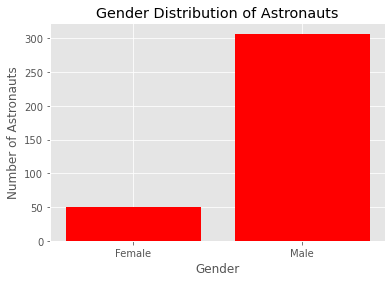

In [43]:
plt.style.use("ggplot")
plt.bar(gender, gender_occurrence_name, color='red')
plt.xlabel("Gender")
plt.ylabel("Number of Astronauts")
plt.title("Gender Distribution of Astronauts")

plt.show()